# CTRL + F9 to run all the code

In [88]:
!gdown 1mdPjiMNyebYnRgAZyA6Yt2y3oUP_fMdw

Downloading...
From: https://drive.google.com/uc?id=1mdPjiMNyebYnRgAZyA6Yt2y3oUP_fMdw
To: /content/MyModel.py
100% 1.80k/1.80k [00:00<00:00, 11.6MB/s]


In [89]:
import shutil
import os
if os.path.exists('/content/DL_Assignment3'):
  os.chdir('/content/')
  shutil.rmtree('/content/DL_Assignment3')
print(os.getcwd())

/content


In [90]:
!git clone https://github.com/BenjaminPhan34/DL_Assignment3

Cloning into 'DL_Assignment3'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 240 (delta 2), reused 236 (delta 1), pack-reused 0
Receiving objects: 100% (240/240), 34.44 MiB | 55.19 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# Begining of the assignment

# Data-preprocessing

In [91]:
import MyModel
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gc

In [92]:
tf.keras.backend.clear_session()

In [93]:
train_image_folder = 'DL_Assignment3/Data/train/image'
train_mask_folder = 'DL_Assignment3/Data/train/mask'
test_image_folder = 'DL_Assignment3/Data/test/image'
test_mask_folder = 'DL_Assignment3/Data/test/mask'

In [94]:
nb_samples_train = 80
nb_samples_test = 20

In [95]:
train_image_files = [os.path.join(train_image_folder, f'{i}.png') for i in range(nb_samples_train)]
train_mask_files = [os.path.join(train_mask_folder, f'{i}.png') for i in range(nb_samples_train)]
test_image_files = [os.path.join(test_image_folder, f'{i}.png') for i in range(nb_samples_test)]
test_mask_files = [os.path.join(test_mask_folder, f'{i}.png') for i in range(nb_samples_test)]

In [96]:
# Images are resized from (512,512,3) to (128,128,3) or (128,128,1) (grayscale)
# Mask are resized from (512,512,3) to (128,128,1) (grayscale)
grayscale_images = []
images = []
size = 128
for image_file in train_image_files:
    img = cv2.resize(cv2.imread(image_file),(size,size))
    grayscale_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(size,size,1))
    if img is not None:
        images.append(img)
train_images = np.array(images)
grayscale_train_images = np.array(grayscale_images)

grayscale_images = []
images = []
for image_file in train_mask_files:
    img = cv2.resize(cv2.imread(image_file),(size,size))
    grayscale_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(size,size,1))
    if img is not None:
        images.append(img)
train_masks = np.array(images)
grayscale_train_masks = np.array(grayscale_images)

grayscale_images = []
images = []
for image_file in test_image_files:
    img = cv2.resize(cv2.imread(image_file),(size,size))
    grayscale_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(size,size,1))
    if img is not None:
        images.append(img)
test_images = np.array(images)
grayscale_test_images = np.array(grayscale_images)

grayscale_images = []
images = []
for image_file in test_mask_files:
    img = cv2.resize(cv2.imread(image_file),(size,size))
    grayscale_images.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(size,size,1))
    if img is not None:
        images.append(img)
test_masks = np.array(images)
grayscale_test_masks = np.array(grayscale_images)

In [97]:
# Normalization for every images,masks + threshhold for masks

# For 3 channels
train_images_n = (train_images - np.min(train_images)) / (np.max(train_images) - np.min(train_images))
test_images_n = (test_images - np.min(test_images)) / (np.max(test_images) - np.min(test_images))

# For 1 channels
grayscale_train_images_n = grayscale_train_images/255
grayscale_train_masks_n = grayscale_train_masks/255
grayscale_test_images_n = grayscale_test_images/255
grayscale_test_masks_n = grayscale_test_masks/255

# Threshhold
thresholded_grayscale_train_masks_n = np.array([np.where(mask_image < 0.5, 0, 1) for mask_image in grayscale_train_masks_n])
thresholded_grayscale_test_masks_n = np.array([np.where(mask_image < 0.5, 0, 1) for mask_image in grayscale_test_masks_n])

In [98]:
train_images = tf.cast(train_images, tf.float32)
test_images = tf.cast(test_images, tf.float32)

train_images_n = tf.cast(train_images_n, tf.float32)
test_images_n = tf.cast(test_images_n, tf.float32)

grayscale_train_images = tf.cast(grayscale_train_images, tf.float32)
grayscale_train_masks = tf.cast(grayscale_train_masks, tf.float32)
grayscale_test_images = tf.cast(grayscale_test_images, tf.float32)
grayscale_test_masks = tf.cast(grayscale_test_masks, tf.float32)

grayscale_train_images_n = tf.cast(grayscale_train_images_n, tf.float32)
grayscale_train_masks_n = tf.cast(grayscale_train_masks_n, tf.float32)
grayscale_test_images_n = tf.cast(grayscale_test_images_n, tf.float32)
grayscale_test_masks_n = tf.cast(grayscale_test_masks_n, tf.float32)

thresholded_grayscale_train_masks_n = tf.cast(thresholded_grayscale_train_masks_n, tf.float32)
thresholded_grayscale_test_masks_n = tf.cast(thresholded_grayscale_test_masks_n, tf.float32)

## Data visualization

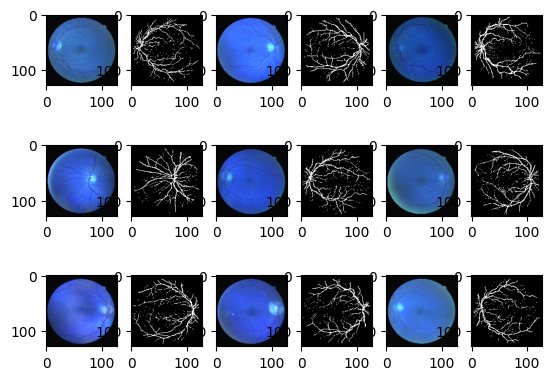

In [99]:
for i in range(9):
    plt.subplot(3, 6, 2 * i + 1)  # First subplot for image
    plt.imshow(test_images_n[i])

    plt.subplot(3, 6, 2 * i + 2)  # Second subplot for mask
    plt.imshow(thresholded_grayscale_test_masks_n[i], cmap='gray')
plt.show()

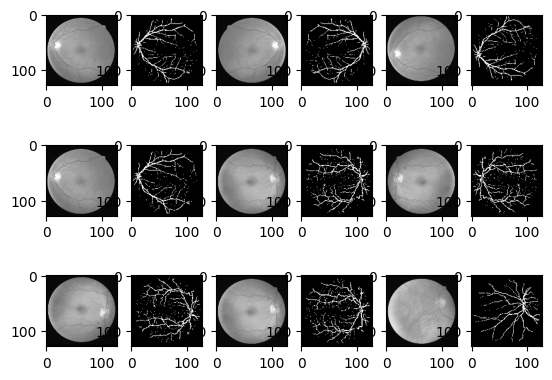

In [100]:
for i in range(9):
    plt.subplot(3, 6, 2 * i + 1)  # First subplot for image
    plt.imshow(grayscale_train_images_n[i], cmap='gray')

    plt.subplot(3, 6, 2 * i + 2)  # Second subplot for mask
    plt.imshow(thresholded_grayscale_train_masks_n[i], cmap='gray')
plt.show()

# Model

In [101]:
# Input shape
input_shape = np.shape(train_images_n[0]) # 3 channels
input_shape_grayscale = np.shape(grayscale_train_images_n[0]) # 1 channel

### 3 channels

In [102]:
tf.keras.backend.clear_session()

In [103]:
model3 = MyModel.UNet(input_shape,1,0.001,3)

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 re_lu (ReLU)                (None, 128, 128, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['re_lu[0][0]']               
                                                                                              

In [104]:
history3 = model3.fit(train_images_n, thresholded_grayscale_train_masks_n, batch_size=4, epochs=50, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 7s 165ms/step - loss: 0.4567 - accuracy: 0.9106 - binary_io_u: 0.4557 - precision: 0.0127 - recall: 9.5007e-04 - val_loss: 0.2922 - val_accuracy: 0.9155 - val_binary_io_u: 0.4578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 2s 125ms/step - loss: 0.2645 - accuracy: 0.9167 - binary_io_u: 0.4583 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2613 - val_accuracy: 0.9155 - val_binary_io_u: 0.4578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 2s 125ms/step - loss: 0.2568 - accuracy: 0.9167 - binary_io_u: 0.4583 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2609 - val_accuracy: 0.9155 - val_binary_io_u: 0.4578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
16/16 [==============================] - 2s 126ms/step - loss: 0.2552 - accuracy: 0.9167 - binary_io_u: 0.4583 - precision: 0.000

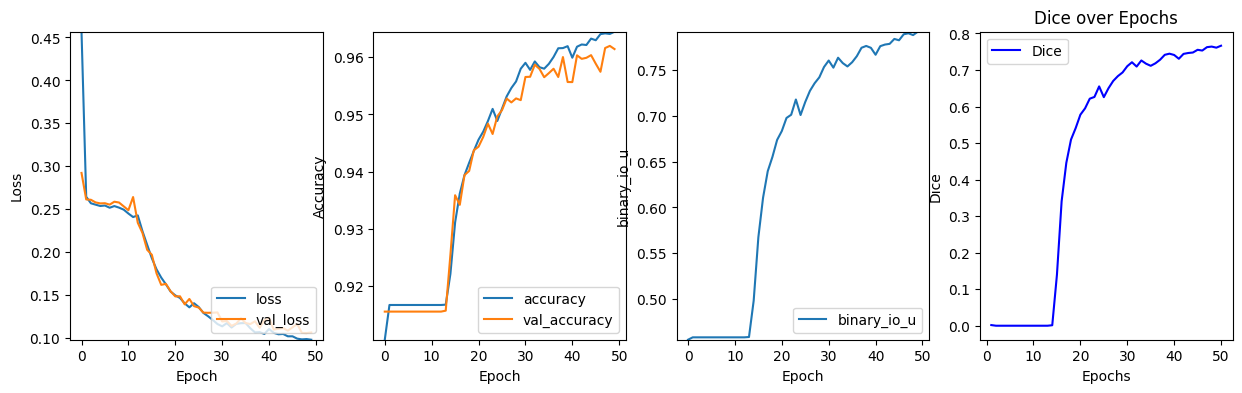

3/3 [==============================] - 0s 209ms/step


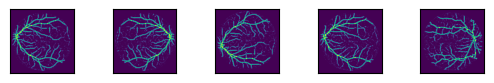

In [105]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
ax[0].plot(history3.history['loss'], label='loss')
ax[0].plot(history3.history['val_loss'], label = 'val_loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([np.min(history3.history['loss']), np.max(history3.history['loss'])])
ax[0].legend(loc='lower right')


ax[1].plot(history3.history['accuracy'], label='accuracy')
ax[1].plot(history3.history['val_accuracy'], label = 'val_accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim([np.min(history3.history['accuracy']), np.max(history3.history['accuracy'])])
ax[1].legend(loc='lower right')


ax[2].plot(history3.history['binary_io_u'], label='binary_io_u')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('binary_io_u')
ax[2].set_ylim([np.min(history3.history['binary_io_u']), np.max(history3.history['binary_io_u'])])
ax[2].legend(loc='lower right')


precision = history3.history["precision"]
recall = history3.history["recall"]

# Calculate Dice from precision and recall
f1_score = [2 * (p * r) / (p + r) if p + r > 0 else 0 for p, r in zip(precision, recall)]

# Plot Dice over time (e.g., epochs)
epochs = range(1, len(f1_score) + 1)
ax[3].plot(epochs, f1_score, 'b', label='Dice')
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Dice')
ax[3].set_title('Dice over Epochs')
ax[3].legend()
plt.show()

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(model3.predict(train_images_n)[i])
plt.show()


In [106]:
evaluation = model3.evaluate(test_images_n, thresholded_grayscale_test_masks_n, verbose=0)


loss = evaluation[0]  # The first metric (typically loss)
accuracy = evaluation[1]  # The second metric (typically accuracy)
binaryIoU = evaluation[2]  # The second metric (typically accuracy)
if (evaluation[3]+evaluation[4]) != 0:
  dice = 2 * (evaluation[3] * evaluation[4])/(evaluation[3]+evaluation[4])
else:
  dice = 0
# Print or display the evaluation results
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"BinaryIoU: {binaryIoU}")
print(f"Dice: {dice}")

Loss: 0.09292713552713394
Accuracy: 0.9667083621025085
BinaryIoU: 0.8012728691101074
Dice: 0.7789328648275129


1/1 [==============================] - 0s 22ms/step


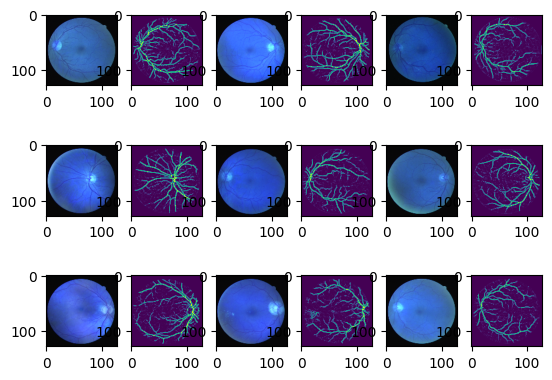

In [107]:
for i in range(9):
    plt.subplot(3, 6, 2 * i + 1)  # First subplot for image
    plt.imshow(test_images_n[i])

    plt.subplot(3, 6, 2 * i + 2)  # Second subplot for mask
    plt.imshow(model3.predict(test_images_n)[i])
plt.show()

### 1 channel

In [108]:
tf.keras.backend.clear_session()

In [109]:
model1 = MyModel.UNet(input_shape_grayscale,1,0.001,3)

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 64)         640       ['input_1[0][0]']             
                                                                                                  
 re_lu (ReLU)                (None, 128, 128, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         36928     ['re_lu[0][0]']               
                                                                                              

In [110]:
history1 = model1.fit(grayscale_train_images_n, thresholded_grayscale_train_masks_n, batch_size=4, epochs=50, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 7s 165ms/step - loss: 1.2668 - accuracy: 0.8627 - binary_io_u: 0.4462 - precision: 0.0684 - recall: 0.0513 - val_loss: 0.4558 - val_accuracy: 0.9155 - val_binary_io_u: 0.4578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
16/16 [==============================] - 2s 126ms/step - loss: 0.4382 - accuracy: 0.9167 - binary_io_u: 0.4583 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.3185 - val_accuracy: 0.9155 - val_binary_io_u: 0.4578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
16/16 [==============================] - 2s 126ms/step - loss: 0.2928 - accuracy: 0.9167 - binary_io_u: 0.4583 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.2671 - val_accuracy: 0.9155 - val_binary_io_u: 0.4578 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
16/16 [==============================] - 2s 127ms/step - loss: 0.2667 - accuracy: 0.9167 - binary_io_u: 0.4583 - precision: 0.0000e+0

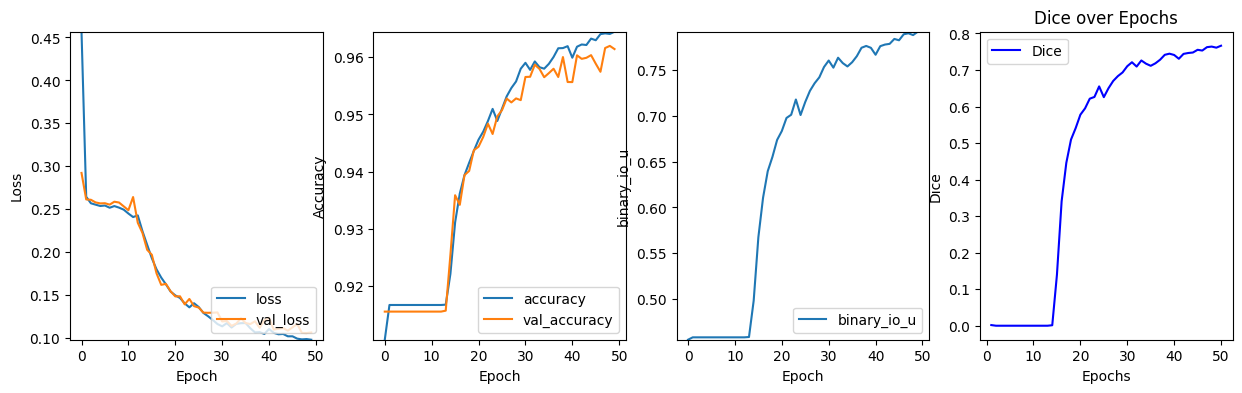

3/3 [==============================] - 0s 216ms/step


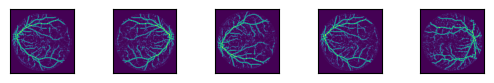

In [111]:
fig, ax = plt.subplots(1, 4, figsize=(15, 4))
ax[0].plot(history3.history['loss'], label='loss')
ax[0].plot(history3.history['val_loss'], label = 'val_loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([np.min(history3.history['loss']), np.max(history3.history['loss'])])
ax[0].legend(loc='lower right')


ax[1].plot(history3.history['accuracy'], label='accuracy')
ax[1].plot(history3.history['val_accuracy'], label = 'val_accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim([np.min(history3.history['accuracy']), np.max(history3.history['accuracy'])])
ax[1].legend(loc='lower right')


ax[2].plot(history3.history['binary_io_u'], label='binary_io_u')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('binary_io_u')
ax[2].set_ylim([np.min(history3.history['binary_io_u']), np.max(history3.history['binary_io_u'])])
ax[2].legend(loc='lower right')


precision = history3.history["precision"]
recall = history3.history["recall"]

# Calculate Dice from precision and recall
f1_score = [2 * (p * r) / (p + r) if p + r > 0 else 0 for p, r in zip(precision, recall)]

# Plot Dice over time (e.g., epochs)
epochs = range(1, len(f1_score) + 1)
ax[3].plot(epochs, f1_score, 'b', label='Dice')
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Dice')
ax[3].set_title('Dice over Epochs')
ax[3].legend()
plt.show()

for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(model1.predict(grayscale_train_images_n)[i])
plt.show()

In [112]:
evaluation = model1.evaluate(grayscale_test_images_n, thresholded_grayscale_test_masks_n, verbose=0)


loss = evaluation[0]  # The first metric (typically loss)
accuracy = evaluation[1]  # The second metric (typically accuracy)
binaryIoU = evaluation[2]  # The second metric (typically accuracy)
if (evaluation[3]+evaluation[4]) != 0:
  dice = 2 * (evaluation[3] * evaluation[4])/(evaluation[3]+evaluation[4])
else:
  dice = 0
# Print or display the evaluation results
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"BinaryIoU: {binaryIoU}")
print(f"Dice: {dice}")

Loss: 0.10588672012090683
Accuracy: 0.9638671875
BinaryIoU: 0.7874975204467773
Dice: 0.760323885236579


1/1 [==============================] - 0s 19ms/step


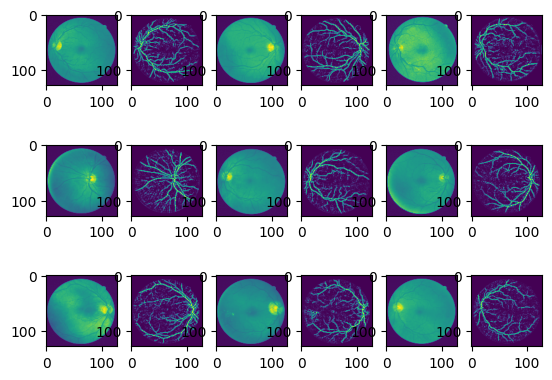

In [113]:
for i in range(9):
    plt.subplot(3, 6, 2 * i + 1)  # First subplot for image
    plt.imshow(grayscale_test_images_n[i])

    plt.subplot(3, 6, 2 * i + 2)  # Second subplot for mask
    plt.imshow(model1.predict(grayscale_test_images_n)[i])
plt.show()

# SAVE MODEL

In [114]:
#model3.save("model3C3L001")
#model1.save("model1C3L001")

# LOAD MODEL

In [115]:
def test_model(model_name,testset):
  model = tf.keras.models.load_model(model_name)
  predictions = model.predict(testset)
  return predictions

In [116]:
#L_model3_pred = test_model("model3C3L001",test_images_n)
#L_model1_pred = test_model("model1C3L001",test_images_n)

In [117]:
#plt.imshow(L_model3_pred[0])
#plt.show()